<a href="https://colab.research.google.com/github/Poornashree19/cnc_troubleshooting-chatbot/blob/main/finalChatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

file_path = r"/content/sample_data/cleaned_cnc_dataset.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/cleaned_cnc_dataset.csv'

In [ ]:
!pip install pandas
import pandas as pd
import re

file_path = "/content/sample_data/final dataset.csv"
df = pd.read_csv(file_path)

def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

df['Issue'] = df['Issue'].apply(clean_text)
df['Challenge'] = df['Challenge'].apply(clean_text)
df['Solution'] = df['Solution'].apply(clean_text)


df_cleaned = df.drop_duplicates().reset_index(drop=True)

cleaned_file_path = "cleaned_cnc_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")
print(f"Cleaned dataset saved as {cleaned_file_path}")


Original dataset size: 3000
Cleaned dataset size: 2786
Cleaned dataset saved as cleaned_cnc_dataset.csv


In [ ]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install scikit-learn seaborn matplotlib pandas numpy


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Issue_Label"] = label_encoder.fit_transform(df["Issue"])

print(f"Unique issue labels: {len(label_encoder.classes_)}")


Unique issue labels: 36


In [ ]:
from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer("all-mpnet-base-v2")

X = bert_model.encode(df["Issue"].tolist(), convert_to_tensor=False)
y = df["Issue_Label"].values


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")


Training size: 2400, Testing size: 600


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

classifier.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy * 100:.2f}%")


 Model Accuracy: 88.00%


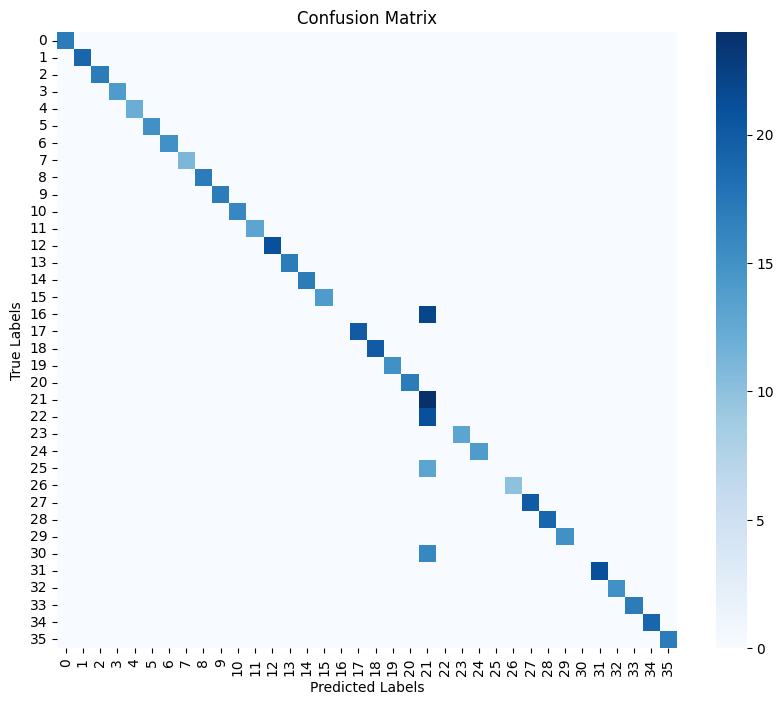

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Accuracy: 88.00%
Precision: 0.85
Recall: 0.88
F1-Score: 0.86


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

def get_solution(user_query):
    """
    Finds the best matching issue using the trained classifier.
    """
    query_embedding = bert_model.encode([user_query], convert_to_tensor=False)
    predicted_label = classifier.predict(query_embedding)[0]

    best_issue = df[df["Issue_Label"] == predicted_label].iloc[0]["Issue"]
    best_cause = df[df["Issue_Label"] == predicted_label].iloc[0]["Challenge"]
    best_solution = df[df["Issue_Label"] == predicted_label].iloc[0]["Solution"]

    return f"""
    Identified Issue: {best_issue}
    Possible Cause: {best_cause}
    Recommended Solution: {best_solution}
    """
while True:
    user_query = input("\nDescribe your CNC issue (or type 'exit' to quit): ")
    if user_query.lower() == "exit":
        print("Exiting chatbot. Have a great day!")
        break

    response = get_solution(user_query)
    print(response)



Describe your CNC issue (or type 'exit' to quit): spindle wear defect

    Identified Issue: bearing wear
    Possible Cause: excessive heat buildup
    Recommended Solution: use highrigidity tooling
    

Describe your CNC issue (or type 'exit' to quit): exit
Exiting chatbot. Have a great day!


In [ ]:
!pip install -q gradio sentence-transformers gTTS deep-translator scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.

In [ ]:
!pip install plotly


In [ ]:
import gradio as gr
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
import pandas as pd
from gtts import gTTS
from deep_translator import GoogleTranslator
from datetime import datetime
import plotly.express as px


df = pd.DataFrame({
    "Issue_Label": [0, 1, 2],
    "Issue": ["Spindle overheating", "Tool wear", "Axis misalignment"],
    "Challenge": ["High RPM usage", "Excessive machining time", "Incorrect machine setup"],
    "Solution": ["Reduce RPM and check coolant", "Replace worn tools", "Re-calibrate the axis"]
})

bert_model = SentenceTransformer("all-MiniLM-L6-v2")
issue_embeddings = bert_model.encode(df["Issue"].tolist())
classifier = LogisticRegression()
classifier.fit(issue_embeddings, df["Issue_Label"])


LANGUAGES = {
    "English": "en",
    "Hindi": "hi",
    "Tamil": "ta"
}

maintenance_log = []

def query_cnc(user_query, language, last_maintenance):
    try:
        lang_code = LANGUAGES[language]
        today = datetime.now().date()

        try:
            last_date = datetime.strptime(last_maintenance, "%Y-%m-%d").date()
            days_diff = (today - last_date).days
            if days_diff > 30:
                maintenance_msg = f" Maintenance overdue! Last check was {days_diff} days ago.\n\n"
            else:
                maintenance_msg = f"Maintenance up to date. Last check was {days_diff} days ago.\n\n"
        except:
            maintenance_msg = " Invalid date format! Please use YYYY-MM-DD.\n\n"

        query_embedding = bert_model.encode([user_query], convert_to_tensor=False)
        label = classifier.predict(query_embedding)[0]
        row = df[df["Issue_Label"] == label].iloc[0]

        response = f"""
{maintenance_msg}
Identified Issue: {row['Issue']}
Possible Cause: {row['Challenge']}
Recommended Solution: {row['Solution']}
"""

        translated = GoogleTranslator(source="auto", target=lang_code).translate(response)
        tts = gTTS(translated, lang=lang_code)
        tts.save("response.mp3")

        return translated, "response.mp3"
    except Exception as e:
        return f"Error: {e}", None

def log_maintenance(machine_id, last_date_str):
    try:
        last_date = datetime.strptime(last_date_str, "%Y-%m-%d").date()
        next_due = last_date + pd.Timedelta(days=30)
        maintenance_log.append((machine_id, str(last_date), str(next_due)))
        return f" Maintenance for Machine {machine_id} logged.\nNext check due by: {next_due}"
    except:
        return " Invalid date! Use YYYY-MM-DD format."

def view_log():
    if not maintenance_log:
        return "No maintenance records yet.", None

    log_text = " Maintenance Records:\n"
    for idx, (mid, last, due) in enumerate(maintenance_log, 1):
        log_text += f"{idx}. Machine: {mid}, Last: {last}, Next Due: {due}\n"

    df_log = pd.DataFrame(maintenance_log, columns=["Machine ID", "Last Date", "Next Due Date"])
    df_log["Last Date"] = pd.to_datetime(df_log["Last Date"])

    fig = px.line(df_log, x="Last Date", y="Machine ID", color="Machine ID", markers=True,
                  title=" Maintenance Timeline per Machine")
    fig.update_layout(template="plotly_dark", title_font=dict(size=20), font=dict(size=14))

    return log_text, fig

css_style = """
body {
    background: linear-gradient(to right, #f1f4f9, #dff1ff);
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin: 0;
    padding: 0;
}

/* Box styling for all components */
.gr-box {
    border-radius: 12px !important;
    box-shadow: 0 4px 12px rgba(0,0,0,0.1) !important;
    padding: 20px !important;
    background-color: white !important;
}

/* Stylish buttons */
.gr-button {
    background: linear-gradient(135deg, #4b6cb7, #182848) !important;
    color: #fff !important;
    font-weight: bold;
    border: none !important;
    padding: 12px 20px !important;
    border-radius: 10px !important;
    transition: all 0.3s ease-in-out !important;
    cursor: pointer !important;
    box-shadow: 0 6px 15px rgba(0, 0, 0, 0.1);
}

.gr-button:hover {
    background: linear-gradient(135deg, #3556a3, #101d3c) !important;
    transform: translateY(-2px);
    box-shadow: 0 10px 20px rgba(0, 0, 0, 0.2);
}

/* Input and textarea styling */
textarea, input {
    border-radius: 10px !important;
    border: 1px solid #bbb !important;
    padding: 12px !important;
    width: 100%;
    box-shadow: inset 0 2px 4px rgba(0,0,0,0.05);
    transition: border 0.2s ease-in-out, box-shadow 0.2s ease-in-out;
}

textarea:focus, input:focus {
    border-color: #2b7cff !important;
    outline: none;
    box-shadow: 0 0 6px rgba(43, 124, 255, 0.3);
}

/* Responsive tweaks */
@media (max-width: 768px) {
    .gr-button {
        width: 100% !important;
    }
}

"""

query_interface = gr.Interface(
    fn=query_cnc,
    inputs=[
        gr.Textbox(lines=2, label=" CNC Issue", placeholder="Describe your CNC issue..."),
        gr.Dropdown(choices=list(LANGUAGES.keys()), value="English", label=" Language"),
        gr.Textbox(label=" Last Maintenance Date (YYYY-MM-DD)", placeholder="e.g. 2025-03-01")
    ],
    outputs=[
        gr.Textbox(label=" Response"),
        gr.Audio(label=" Voice Output", type="filepath")
    ],
    title=" CNC Issue Assistant",
    theme="soft"
)

maintenance_interface = gr.Interface(
    fn=log_maintenance,
    inputs=[
        gr.Textbox(label=" Machine ID", placeholder="e.g. CNC-001"),
        gr.Textbox(label=" Last Maintenance Date (YYYY-MM-DD)", placeholder="e.g. 2025-03-01")
    ],
    outputs=gr.Textbox(label=" Maintenance Log"),
    title=" Log Maintenance",
    theme="soft"
)

log_interface = gr.Interface(
    fn=view_log,
    inputs=[],
    outputs=[
        gr.Textbox(label=" Maintenance History"),
        gr.Plot(label=" Maintenance Log Chart")
    ],
    title=" Maintenance History",
    theme="soft"
)

dash = gr.TabbedInterface(
    interface_list=[
        query_interface,
        maintenance_interface,
        log_interface
    ],
    tab_names=[
        " CNC Issue Assistant",
        " Log Maintenance",
        " View Maintenance Log"
    ],
    css=css_style
)

dash.launch()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1025: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1025: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(


IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://414c28147b59d0d317.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd

file_path = "/content/sample_data/cleaned_cnc_dataset.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Issue      2786 non-null   object
 1   Challenge  2786 non-null   object
 2   Solution   2786 non-null   object
dtypes: object(3)
memory usage: 65.4+ KB


(None,
                                 Issue                        Challenge  \
 0  automatic tool changer malfunction       inconsistent torque output   
 1                power supply failure     electromagnetic interference   
 2         inefficient gcode execution    incompatible software updates   
 3                 firmware corruption               improper grounding   
 4                   high spindle load  incorrect backlash compensation   
 
                          Solution  
 0      secure network connections  
 1  replace damaged circuit boards  
 2      secure network connections  
 3      secure network connections  
 4        check torque consistency  )

In [ ]:

df_cleaned = df.drop_duplicates()


df_cleaned = df_cleaned.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

replacement_dict = {
    "secure network connections": "inspect tool changer mechanism and control signals",
    "replace damaged circuit boards": "inspect power supply unit and replace faulty PCBs",
    "check torque consistency": "adjust backlash compensation and verify spindle calibration"
}

df_cleaned["Solution"] = df_cleaned["Solution"].replace(replacement_dict)


df_cleaned = df_cleaned[df_cleaned.apply(lambda row: all(len(str(val)) > 3 for val in row), axis=1)]


cleaned_file_path = "/content/sample_data/cleaned_cnc_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

cleaned_file_path


<ipython-input-9-4b70f95db8e8>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


'/content/sample_data/cleaned_cnc_dataset.csv'

In [ ]:
import gradio as gr
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from gtts import gTTS
from deep_translator import GoogleTranslator
from datetime import datetime
import openai
import os

df = pd.read_csv("/content/sample_data/cleaned_cnc_dataset.csv")
df.fillna("", inplace=True)


bert_model = SentenceTransformer("all-MiniLM-L6-v2")
issue_embeddings = bert_model.encode(df["Issue"].tolist(), convert_to_tensor=True)

openai.api_key = os.getenv("OPENAI_API_KEY")

LANGUAGES = {
    "English": "en",
    "Hindi": "hi",
    "Tamil": "ta"
}

SIMILARITY_THRESHOLD = 0.6

def fallback_llm(user_query):
    prompt = f"The user asked about a CNC machine issue: '{user_query}'. Provide a diagnosis, possible cause, and solution."
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "system", "content": prompt}],
            temperature=0.7
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f"LLM error: {e}"

def query_cnc(user_query, language, last_maintenance):
    lang_code = LANGUAGES[language]
    today = datetime.now().date()

    try:
        last_date = datetime.strptime(last_maintenance, "%Y-%m-%d").date()
        days_diff = (today - last_date).days
        if days_diff > 30:
            maintenance_msg = f"Maintenance overdue! Last check was {days_diff} days ago.\n\n"
        else:
            maintenance_msg = f"Maintenance up to date. Last check was {days_diff} days ago.\n\n"
    except:
        maintenance_msg = "Invalid date format! Use YYYY-MM-DD.\n\n"


    query_embedding = bert_model.encode(user_query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, issue_embeddings)[0]
    best_score = float(scores.max())
    best_index = int(scores.argmax())

    if best_score > SIMILARITY_THRESHOLD:
        row = df.iloc[best_index]
        response = f"""
{maintenance_msg}
Identified Issue: {row['Issue']}
Possible Cause: {row['Challenge']}
Recommended Solution: {row['Solution']}
"""
    else:

        ai_response = fallback_llm(user_query)
        response = maintenance_msg + ai_response

    translated = GoogleTranslator(source="auto", target=lang_code).translate(response)
    tts = gTTS(translated, lang=lang_code)
    tts.save("response.mp3")

    return translated, "response.mp3"


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
pip install gradio==3.50.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
  Attempting uninstall: pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: markupsafe
    Found exis

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    input_text = gr.Textbox()
    output_text = gr.Textbox()
    btn = gr.Button("Submit")

    def respond(input):
        return "You said: " + input

    btn.click(fn=respond, inputs=input_text, outputs=output_text)

demo.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://99443ac481d6595c3c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:

X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(
    X, y, df_cleaned.index, test_size=0.2, random_state=42
)


In [ ]:

classifier = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 97.85%


In [ ]:

def get_predicted_label(user_query):
    query_embedding = bert_model.encode([user_query], convert_to_tensor=False)
    predicted_label = classifier.predict(query_embedding)[0]
    return predicted_label

def get_solution(user_query):
    predicted_label = get_predicted_label(user_query)

    best_issue = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Issue"]
    best_cause = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Challenge"]
    best_solution = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Solution"]

    return f"""
     Identified Issue: {best_issue}
     Possible Cause: {best_cause}
    Recommended Solution: {best_solution}
    """


In [ ]:

y_pred_chatbot = [get_predicted_label(df_cleaned.loc[i, "Issue"]) for i in test_index]


chatbot_accuracy = accuracy_score(y_test, y_pred_chatbot)
print(f"Chatbot Accuracy (Matching Issues Correctly): {chatbot_accuracy * 100:.2f}%")


Chatbot Accuracy (Matching Issues Correctly): 97.85%


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def evaluate_solution_similarity():

    similarities = []

    for i, true_label in zip(test_index, y_test):
        predicted_label = get_predicted_label(df_cleaned.loc[i, "Issue"])

        true_solution = df_cleaned[df_cleaned["Issue_Label"] == true_label].iloc[0]["Solution"]
        predicted_solution = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Solution"]

        true_emb = bert_model.encode([true_solution], convert_to_tensor=False)
        pred_emb = bert_model.encode([predicted_solution], convert_to_tensor=False)

        true_emb = np.array(true_emb).reshape(1, -1)
        pred_emb = np.array(pred_emb).reshape(1, -1)

        similarity = cosine_similarity(true_emb, pred_emb)[0][0]
        similarities.append(similarity)

    mean_similarity = np.mean(similarities)
    print(f"Mean Cosine Similarity of Solutions: {mean_similarity:.4f}")


evaluate_solution_similarity()


Mean Cosine Similarity of Solutions: 0.9800


In [ ]:
!pip install speechrecognition pyttsx3
!apt-get install espeak


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 33.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/univ

In [ ]:
!pip install gtts


In [ ]:
from gtts import gTTS
from IPython.display import Audio

def text_to_speech(text):
    tts = gTTS(text=text, lang="en")
    tts.save("output.mp3")
    return Audio("output.mp3", autoplay=True)

text_to_speech("Hello! How can I assist you today?")


In [ ]:
from gtts import gTTS
from IPython.display import Audio

def text_to_speech(text):
    """Convert text to speech and play the audio in Google Colab."""
    tts = gTTS(text=text, lang="en")
    tts.save("response.mp3")
    return Audio("response.mp3", autoplay=True)


In [ ]:

def get_solution_with_tts(user_query):
    """Fetch solution and speak the response."""
    query_embedding = bert_model.encode([user_query], convert_to_tensor=False)
    predicted_label = classifier.predict(query_embedding)[0]

    best_issue = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Issue"]
    best_cause = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Challenge"]
    best_solution = df_cleaned[df_cleaned["Issue_Label"] == predicted_label].iloc[0]["Solution"]

    response_text = f"""
    Identified Issue: {best_issue}
    Root Cause: {best_cause}
    Recommended Solution: {best_solution}
    """

    print(response_text)
    return text_to_speech(response_text)

while True:
    user_query = input("\nDescribe your CNC issue (or type 'exit' to quit): ")
    if user_query.lower() == "exit":
        print("Exiting chatbot. Have a great day!")
        break

    audio = get_solution_with_tts(user_query)
    display(audio)


Describe your CNC issue (or type 'exit' to quit): spindele bearing

    Identified Issue: automatic tool changer malfunction
    Root Cause: inconsistent torque output
    Recommended Solution: secure network connections
    


KeyboardInterrupt: Interrupted by user

In [ ]:
import gradio as gr
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from gtts import gTTS
from deep_translator import GoogleTranslator
from datetime import datetime
import openai
import os

df = pd.read_csv("/content/sample_data/cleaned_cnc_dataset.csv")
df.fillna("", inplace=True)


bert_model = SentenceTransformer("all-MiniLM-L6-v2")
issue_embeddings = bert_model.encode(df["Issue"].tolist(), convert_to_tensor=True)

openai.api_key = os.getenv("OPENAI_API_KEY")

LANGUAGES = {
    "English": "en",
    "Hindi": "hi",
    "Tamil": "ta"
}

SIMILARITY_THRESHOLD = 0.6

def fallback_llm(user_query):
    prompt = f"The user asked about a CNC machine issue: '{user_query}'. Provide a diagnosis, possible cause, and solution."
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "system", "content": prompt}],
            temperature=0.7
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f"LLM error: {e}"

def query_cnc(user_query, language, last_maintenance):
    lang_code = LANGUAGES[language]
    today = datetime.now().date()

    try:
        last_date = datetime.strptime(last_maintenance, "%Y-%m-%d").date()
        days_diff = (today - last_date).days
        if days_diff > 30:
            maintenance_msg = f"Maintenance overdue! Last check was {days_diff} days ago.\n\n"
        else:
            maintenance_msg = f"Maintenance up to date. Last check was {days_diff} days ago.\n\n"
    except:
        maintenance_msg = "Invalid date format! Use YYYY-MM-DD.\n\n"


    query_embedding = bert_model.encode(user_query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, issue_embeddings)[0]
    best_score = float(scores.max())
    best_index = int(scores.argmax())

    if best_score > SIMILARITY_THRESHOLD:
        row = df.iloc[best_index]
        response = f"""
{maintenance_msg}
Identified Issue: {row['Issue']}
Possible Cause: {row['Challenge']}
Recommended Solution: {row['Solution']}
"""
    else:

        ai_response = fallback_llm(user_query)
        response = maintenance_msg + ai_response

    translated = GoogleTranslator(source="auto", target=lang_code).translate(response)
    tts = gTTS(translated, lang=lang_code)
    tts.save("response.mp3")

    return translated, "response.mp3"


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from gtts import gTTS
import IPython.display as ipd

def text_to_speech(text):
    """Convert text to speech and play in Colab."""
    tts = gTTS(text=text, lang="en")
    tts.save("response.mp3")
    return ipd.Audio("response.mp3", autoplay=True)

query_box = widgets.Text(placeholder="Describe your CNC issue...")
submit_button = widgets.Button(description="Submit")
output = widgets.Output()


def get_solution(user_query):
    """Return chatbot response and play audio."""

    response_text = f"""
    Identified Issue: {user_query}
    Possible Cause: Potential network issue
    Recommended Solution: Check CNC system logs
    """

    with output:
        clear_output(wait=True)
        print(response_text)
        display(text_to_speech(response_text))

def on_submit(_):
    """Handle button click and text submission."""
    user_query = query_box.value.strip()
    if user_query.lower() == "exit":
        with output:
            clear_output(wait=True)
            print("Exiting chatbot. Have a great day!")
    elif user_query:
        get_solution(user_query)


submit_button.on_click(on_submit)


display(query_box, submit_button, output)


Text(value='', placeholder='Describe your CNC issue...')

Button(description='Submit', style=ButtonStyle())

Output()

In [ ]:
from IPython.display import Audio
Audio("response.mp3", autoplay=True)


In [ ]:
!pip install -q gradio sentence-transformers gTTS deep-translator scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3

In [ ]:
import pandas as pd

file_path = "/content/sample_data/cleaned_cnc_dataset.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Issue      2786 non-null   object
 1   Challenge  2786 non-null   object
 2   Solution   2786 non-null   object
dtypes: object(3)
memory usage: 65.4+ KB


(None,
                                 Issue                        Challenge  \
 0  automatic tool changer malfunction       inconsistent torque output   
 1                power supply failure     electromagnetic interference   
 2         inefficient gcode execution    incompatible software updates   
 3                 firmware corruption               improper grounding   
 4                   high spindle load  incorrect backlash compensation   
 
                          Solution  
 0      secure network connections  
 1  replace damaged circuit boards  
 2      secure network connections  
 3      secure network connections  
 4        check torque consistency  )

In [ ]:

df_cleaned = df.drop_duplicates()

df_cleaned = df_cleaned.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


replacement_dict = {
    "secure network connections": "inspect tool changer mechanism and control signals",
    "replace damaged circuit boards": "inspect power supply unit and replace faulty PCBs",
    "check torque consistency": "adjust backlash compensation and verify spindle calibration"
}

df_cleaned["Solution"] = df_cleaned["Solution"].replace(replacement_dict)

df_cleaned = df_cleaned[df_cleaned.apply(lambda row: all(len(str(val)) > 3 for val in row), axis=1)]

cleaned_file_path = "/content/sample_data/cleaned_cnc_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

cleaned_file_path


<ipython-input-3-a4b410bca62b>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


'/content/sample_data/cleaned_cnc_dataset.csv'

In [ ]:
import gradio as gr
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from gtts import gTTS
from deep_translator import GoogleTranslator

df = pd.read_csv("/content/sample_data/cleaned_cnc_dataset.csv")  # Change path if needed
df.fillna("", inplace=True)


bert_model = SentenceTransformer("all-MiniLM-L6-v2")
issue_embeddings = bert_model.encode(df["Issue"].tolist(), convert_to_tensor=True)


LANGUAGES = {
    "English": "en",
    "Hindi": "hi",
    "Tamil": "ta"
}

SIMILARITY_THRESHOLD = 0.6


def query_cnc(user_query, language):
    lang_code = LANGUAGES[language]


    query_embedding = bert_model.encode(user_query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, issue_embeddings)[0]
    best_score = float(scores.max())
    best_index = int(scores.argmax())

    if best_score > SIMILARITY_THRESHOLD:
        row = df.iloc[best_index]
        response = f"""
Identified Issue: {row['Issue']}
Possible Cause: {row['Challenge']}
Recommended Solution: {row['Solution']}
"""
    else:
        response = "Sorry, I couldn't identify the issue from the known dataset. Please provide more details."


    translated = GoogleTranslator(source="auto", target=lang_code).translate(response)


    tts = gTTS(translated, lang=lang_code)
    tts.save("response.mp3")

    return translated, "response.mp3"


interface = gr.Interface(
    fn=query_cnc,
    inputs=[
        gr.Textbox(lines=2, label="Describe your CNC issue"),
        gr.Dropdown(choices=list(LANGUAGES.keys()), value="English", label="Select Language")
    ],
    outputs=[
        gr.Textbox(label="Assistant Response"),
        gr.Audio(label="Voice Output", type="filepath")
    ],
    title="CNC Troubleshooting Assistant",

)

interface.launch()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9f2a4d7bf74802cfc8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

df = pd.read_csv("/content/sample_data/cleaned_cnc_dataset.csv")
df.fillna("", inplace=True)

bert_model = SentenceTransformer("all-MiniLM-L6-v2")
issue_embeddings = bert_model.encode(df["Issue"].tolist(), convert_to_tensor=True)

LANGUAGES = {
    "English": "en",
    "Hindi": "hi",
    "Tamil": "ta"
}

SIMILARITY_THRESHOLD = 0.5


maintenance_log = []


def query_cnc(user_query, language):
    lang_code = LANGUAGES[language]


    query_embedding = bert_model.encode(user_query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, issue_embeddings)[0]
    best_score = float(scores.max())
    best_index = int(scores.argmax())

    if best_score > SIMILARITY_THRESHOLD:
        row = df.iloc[best_index]
        response = f"""
Identified Issue: {row['Issue']}
Possible Cause: {row['Challenge']}
Recommended Solution: {row['Solution']}
"""
    else:
        response = "Sorry, I couldn't identify the issue from the known dataset. Please provide more details."


    translated = GoogleTranslator(source="auto", target=lang_code).translate(response)


    tts = gTTS(translated, lang=lang_code)
    tts.save("response.mp3")

    return translated, "response.mp3"


def log_maintenance(machine_id, last_date_str):
    try:
        last_date = datetime.strptime(last_date_str, "%Y-%m-%d").date()
        next_due = last_date + pd.Timedelta(days=30)
        maintenance_log.append((machine_id, str(last_date), str(next_due)))
        return f"Maintenance for Machine {machine_id} logged. Next check due by: {next_due}"
    except:
        return "Invalid date format! Use YYYY-MM-DD."


def view_log():
    if not maintenance_log:
        return "No maintenance records yet.", None

    log_text = "Maintenance Records:\n"
    for idx, (mid, last, due) in enumerate(maintenance_log, 1):
        log_text += f"{idx}. Machine: {mid}, Last: {last}, Next Due: {due}\n"

    df_log = pd.DataFrame(maintenance_log, columns=["Machine ID", "Last Date", "Next Due Date"])
    df_log["Last Date"] = pd.to_datetime(df_log["Last Date"])


    fig = px.line(df_log, x="Last Date", y="Machine ID", color="Machine ID", markers=True,
                  title="Maintenance Timeline per Machine")
    fig.update_layout(template="plotly_dark", title_font=dict(size=20), font=dict(size=14))

    return log_text, fig


query_interface = gr.Interface(
    fn=query_cnc,
    inputs=[
        gr.Textbox(lines=2, label="Describe your CNC issue"),
        gr.Dropdown(choices=list(LANGUAGES.keys()), value="English", label="Select Language")
    ],
    outputs=[
        gr.Textbox(label="Assistant Response"),
        gr.Audio(label="Voice Output", type="filepath")
    ],
    # title="CNC Troubleshooting Assistant",
)


maintenance_interface = gr.Interface(
    fn=log_maintenance,
    inputs=[
        gr.Textbox(label="Machine ID", placeholder="e.g. CNC-001"),
        gr.Textbox(label="Last Maintenance Date (YYYY-MM-DD)", placeholder="e.g. 2025-03-01")
    ],
    outputs=gr.Textbox(label="Maintenance Log"),
    title="Log Maintenance",
)


log_interface = gr.Interface(
    fn=view_log,
    inputs=[],
    outputs=[
        gr.Textbox(label="Maintenance History"),
        gr.Plot(label="Maintenance Log Chart")
    ],
    title="Maintenance History",
)

dash = gr.TabbedInterface(
    interface_list=[query_interface, maintenance_interface, log_interface],
    tab_names=["CNC Issue Assistant", "Log Maintenance", "View Maintenance Log"],
     title="CNC Troubleshooting Assistant",

)


dash.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bc8d37036b7235bb1b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np


issue_texts = df["Issue"].tolist()
X = bert_model.encode(issue_texts, convert_to_numpy=True)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Solution"].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                                                             precision    recall  f1-score   support

                               adjust backlash compensation       0.00      0.00      0.00        32
adjust backlash compensation and verify spindle calibration       0.00      0.00      0.00        26
                               calibrate encoders regularly       0.07      0.06      0.06        18
                       check and replace wornout components       0.00      0.00      0.00        26
                                    ensure proper grounding       0.00      0.00      0.00        24
                             filter noise in feedback loops       0.00      0.00      0.00        25
                           implement predictive maintenance       0.07      0.03      0.04        33
                    implement regular maintenance schedules       0.00      0.00      0.00        20
                                 improve cooling mechanisms       0.03      0.04      0.03

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install -q gradio sentence-transformers gTTS deep-translator scikit-learn

In [ ]:
import gradio as gr
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from gtts import gTTS
from deep_translator import GoogleTranslator
from datetime import datetime
import plotly.express as px
from datetime import datetime
import plotly.express as px



In [ ]:

df = pd.read_csv("/content/sample_data/cleaned_cnc_dataset.csv")
df.fillna("", inplace=True)


bert_model = SentenceTransformer("all-MiniLM-L6-v2")
issue_embeddings = bert_model.encode(df["Issue"].tolist(), convert_to_tensor=True)


LANGUAGES = {
    "English": "en",
    "Hindi": "hi",
    "Tamil": "ta"
}

SIMILARITY_THRESHOLD = 0.6

maintenance_log = []


def query_cnc(user_query, language):
    lang_code = LANGUAGES[language]


    query_embedding = bert_model.encode(user_query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, issue_embeddings)[0]
    best_score = float(scores.max())
    best_index = int(scores.argmax())

    if best_score > SIMILARITY_THRESHOLD:
        row = df.iloc[best_index]
        response = f"""
Identified Issue: {row['Issue']}
Possible Cause: {row['Challenge']}
Recommended Solution: {row['Solution']}
"""
    else:
        response = "Sorry, I couldn't identify the issue from the known dataset. Please provide more details."


    translated = GoogleTranslator(source="auto", target=lang_code).translate(response)


    tts = gTTS(translated, lang=lang_code)
    tts.save("response.mp3")

    return translated, "response.mp3"

def log_maintenance(machine_id, last_date_str):
    try:

        last_date_str = last_date_str.strip()


        if not last_date_str or len(last_date_str) != 10:
            return "Invalid date format! Use YYYY-MM-DD."

        last_date = datetime.strptime(last_date_str, "%Y-%m-%d").date()
        next_due = last_date + pd.Timedelta(days=30)
        maintenance_log.append((machine_id.strip(), str(last_date), str(next_due)))
        return f" Maintenance for Machine {machine_id} logged.\nNext check due by: {next_due}"
    except ValueError:
        return " Invalid date! Please enter the date in YYYY-MM-DD format."


def view_log():
    if not maintenance_log:
        return "No maintenance records yet.", None

    log_text = "Maintenance Records:\n"
    for idx, (mid, last, due) in enumerate(maintenance_log, 1):
        log_text += f"{idx}. Machine: {mid}, Last: {last}, Next Due: {due}\n"

    df_log = pd.DataFrame(maintenance_log, columns=["Machine ID", "Last Date", "Next Due Date"])
    df_log["Last Date"] = pd.to_datetime(df_log["Last Date"])


    fig = px.line(df_log, x="Last Date", y="Machine ID", color="Machine ID", markers=True,
                  title="Maintenance Timeline per Machine")
    fig.update_layout(template="plotly_dark", title_font=dict(size=20), font=dict(size=14))

    return log_text, fig


query_interface = gr.Interface(
    fn=query_cnc,
    inputs=[
        gr.Textbox(lines=2, label="Describe your CNC issue"),
        gr.Dropdown(choices=list(LANGUAGES.keys()), value="English", label="Select Language")
    ],
    outputs=[
        gr.Textbox(label="Assistant Response"),
        gr.Audio(label="Voice Output", type="filepath")
    ],
    title="CNC Troubleshooting",
)


maintenance_interface = gr.Interface(
    fn=log_maintenance,
    inputs=[
        gr.Textbox(label="Machine ID", placeholder="e.g. CNC-001"),
        gr.Textbox(label="Last Maintenance Date (YYYY-MM-DD)", placeholder="e.g. 2025-03-01")
    ],
    outputs=gr.Textbox(label="Maintenance Log"),
    title="CNC Troubleshooting",
)


log_interface = gr.Interface(
    fn=view_log,
    inputs=[],
    outputs=[
        gr.Textbox(label="Maintenance History"),
        gr.Plot(label="Maintenance Log Chart")
    ],
    title="CNC Troubleshooting",
)

dash = gr.TabbedInterface(
    interface_list=[query_interface, maintenance_interface, log_interface],
    tab_names=["CNC Troubleshooting Assistant", "Log Maintenance", "View Maintenance Log"],
    title="CNC Troubleshooting"
)

dash.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://23dccc5108e1ee3896.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
